# Questão 1

___

Utilizando a toolbox de sua preferência, realize o treinamento de uma rede neural artificial do tipo Perceptron Multicamadas para resolver um problema de classificação multiclasses. Além do conjunto de treinamento, considere um conjunto de validação para avaliação final do método. 

Descreva as características dos dados, descreva a arquitetura da rede (dimensão, número de camadas) e discuta aspectos de desempenho (forma de divisão dos dados para treinamento, validação e teste, porcentagem de classificação correta, matriz de confusão).

___

## Introdução

Para a execucação deste trabalho escolhi o dataset 'wine-quality' da UCI Machine Learning repository. O dataset descreve 11 features fisico-quimicas de mais de 4000 vinhos do norte de Portugal e uma target que descreve a qualidade do vinho em uma nota de 0 a 10. Utilizando esse dataset a principal tarefa de machine learning é prever a qualidade de um vinho levando em consideração sua features.

A feature target, apesar de numericamente representada determina uma categoria na forma ordinal. Ela possui valores que podem variar entre 0 e 10, sendo 0 a pior qualidade e 10 a melhor qualidade, porém não existe a possibilidade de uma nota 11 esse é o comportamento de uma variável categorica ordinal. Essa é a descrição completa das features esperadas no dataset.

| feature_name                                  	|
|-----------------------------------------------	|
| fixed acidity                                 	|
| volatile acidity                              	|
| citric acid                                   	|
| residual sugar                                	|
| chlorides                                     	|
| free sulfur dioxide                           	|
| total sulfur dioxide                          	|
| density                                       	|
| pH                                            	|
| sulphates                                     	|
| alcohol                                       	|
| quality (score between 0 and 10) -- target -- 	|


## Etapas

Montei o trabalho de forma que ele possa ser reproduzido de forma fácil e sem a necessidade da execução de jupyter notebooks. No arquivo README.MD na raiz do projeto coloquei também uma estrutura do projeto. A pasta 'src' prossui scripts feitos inteiramente em python para executar as tarefas de coleta dos dados, limpeza, feature engineering, construção e treinamento do modelo MLP que será utilizado nesse projeto. O diagrama abaixo demonstra as etapas do projeto seguindo o código em 'src'.


![etapas](etapas.png)



### make_dataset.py

Esse script : 

1. avalia todos os arquivos .csv encontrados dentro de 'data/raw';
2. os concatena; 
3. reseta seus índices para melhor indexação; 
4. salva o resultado chamado de intermediate_dataset.csv em 'data/intermediate'.

### make_features.py

Esse script:

1. carrega o dataset intermediário;
2. renomeia as colunas;
3. cria a feature 'rest_of_sulfur' com os valores da diferença entre as feature 'total sulfur dioxide' e 'free sulfur dioxide';
4. cria a feature 'volatile_acid_types' utilizando a tecnica de binning com a feature 'volatile_acid';
5. crea a feature 'target' utilizando a tecnica de binning e definindo três classes ( 0 -> quality 3,4,5; 1 -> quality  6; 2 -> quality > 6);
6. drop a feature 'quality' para manter somente a feature 'target';
7. define X e y;
8. usando ColumnTransformer aplica One Hot Encoding à feature 'volatile_acid_types' e Quantile Transformer a todas as outras;
9. cria o dataframe final utilizando o resultado do ColumnTransformer e adicionando novamente a coluna 'target' definida como y;
10. salva o dataframe final como 'final_dataframe.csv' em 'data/final'.

obs.: Não houve a necessidade de tratamento de valores nulos, pois o dataset não os possui. Não houve a necessidade do tratamento de outlier porque a QuantileTransformer é considerado uma técnicas robusta a outlier, suavizando o peso que eles possuem no momento da trasnformação.

### train_model.py

Esse script define a classe myMLPmodel que:

1. carrega o dataframe final;
2. define X e y;
3. divide os dados em treino e teste;
4. converte os valores de y para categóricas utilizando keras.to_categorical;
5. define o modelo sequencial;
6. adiciona ao modelo sequencial 3 camadas com ativação relu, sendo que a primeira e a terceira possuem regularização l2 para previnir overfitting;
7. adiciona a camada de saída com ativação softmax.
8. compila o modelo utilizando 'adam' como otimizador, 'categorical_crossentropy' como loss e 'accuracy' como métrica;
9. fita o modelo utilizando um batch_size de 32 e passando também os dados para validação ao final de cada época;
10. salva o modelo em json e seus pesos em hd5;
11. gera um subplot demonstrando o comportamento das curvas de loss e accuracy;
12. gera o plot do modelo, demonstrando a sua arquitetura;
13. gera a matrix de confusão.

O modelo foi todo criado em formato de classe do python para que pudesse ser instanciado várias vezes e ter seus resultados comparados.

A análise estatística completa dos dados pode ser vista em 'notebooks/1.0-eda-data-prep.ipynb'.

### Referências
___

[Dataset - UCI MACHINE LEARNING REPOSITORY](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)

[WHAT IS THE DIFFERENCE BETWEEN CATEGORICAL, ORDINAL AND NUMERICAL VARIABLES?](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-numerical-variables/)

[Keras documentation](https://keras.io/)

[Sequential Model - Keras](https://keras.io/models/sequential/)

[to_categorical - Keras](https://keras.io/utils/#to_categorical)

[regularizers - Keras](https://keras.io/regularizers/)

[Understanding Categorical Cross-Entropy Loss, Binary Cross-Entropy Loss, Softmax Loss, Logistic Loss, Focal Loss and all those confusing names](https://gombru.github.io/2018/05/23/cross_entropy_loss/)

___

## Execução

Para a execução do projeto precisamos primeiro, executar os scripts make_dataset.py e make_features.py.

In [1]:
## Executando o script make_dataset.py
!python3 ./src/data/make_dataset.py

Files found: ['data/raw/winequality-red.csv', 'data/raw/winequality-white.csv'].
100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 250.55it/s]
Dataframes created: 2.
Intermediate dataframe created: 6497 rows e 12 columns.


In [2]:
## Executando o script make_features.py
!python3 ./src/features/make_features.py

File found: intermediate_dataset.csv
Loading the dataset.
Initializing data preparation.
final_dataframe created with (6497, 17) shape.


Com essas duas execuções o dataset já foi completamente carregado, tratado e transformado entrando em estado model-ready.

In [3]:
## importando a classe que treina o modelo

from src.models.train_model import myMLPmodel

Using TensorFlow backend.


In [4]:
## o método construtor da classe nos pede duas informações, a quantidade de épocas e o tamanho do dataset de teste em relação ao dataset original.

model = myMLPmodel(NUM_OF_EPOCHS = 200, test_size= 0.25)

In [5]:
## treinando o modelo

model.train()

Train on 4872 samples, validate on 1625 samples
Epoch 1/200
4872/4872 [==============================] - 1s 195us/step - loss: 2.6289 - accuracy: 0.3144 - val_loss: 2.0132 - val_accuracy: 0.4142
Epoch 2/200
4872/4872 [==============================] - 0s 92us/step - loss: 1.6954 - accuracy: 0.4442 - val_loss: 1.4324 - val_accuracy: 0.4825
Epoch 3/200
4872/4872 [==============================] - 0s 70us/step - loss: 1.2775 - accuracy: 0.5300 - val_loss: 1.1554 - val_accuracy: 0.5477
Epoch 4/200
4872/4872 [==============================] - 1s 105us/step - loss: 1.0798 - accuracy: 0.5686 - val_loss: 1.0281 - val_accuracy: 0.5582
Epoch 5/200
4872/4872 [==============================] - 0s 79us/step - loss: 0.9855 - accuracy: 0.5759 - val_loss: 0.9676 - val_accuracy: 0.5674
Epoch 6/200
4872/4872 [==============================] - 0s 74us/step - loss: 0.9414 - accuracy: 0.5819 - val_loss: 0.9430 - val_accuracy: 0.5618
Epoch 7/200
4872/4872 [==============================] - 0s 85us/step - lo

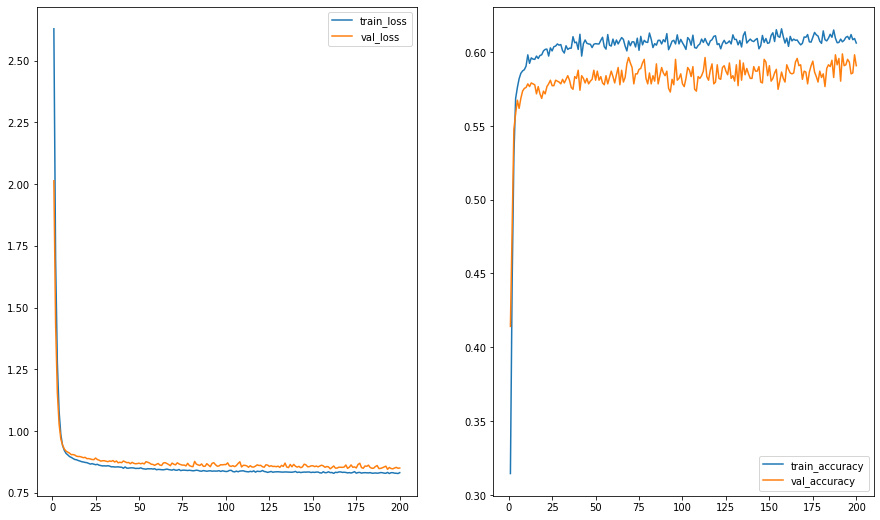

In [10]:
## gerando as curvas

model.generate_loss_curves()

As curvas de loss em teste e validação demonstram que após um pouco mais de 10 épocas o modelo já consegue minimizar bem sua função. O comportamento de 'train_loss' e 'val_loss' não demonstram overfitting, também sustentado pelas curvas 'train_accuracy' e 'val_accuracy'.

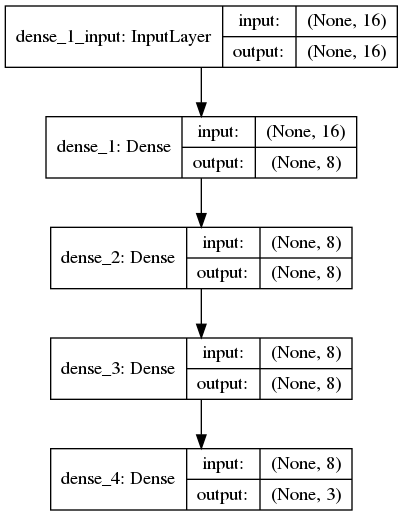

In [11]:
## gerando o plot de arquitetura do modelo

model.model_plot()

A arquitetura demonstrada acima é composta por :

Um layer de entrada com 16 neurônios de entrada e 16 saídas. Esse layer não efetua nenhum tipo de operação nos dados, somente os passa pra frente.

Um layer (dense_1) densamente conectado de 8 neurônios que recebe 16 entradas em cada um deles e entrega 8 saídas. Esse layer já efetua operações com a ativação ReLU e com uma regularização l2.

Um layer (dense_2) densamente conectado de 8 neurônios que recebe 8 entradas em cada um deles e entrega 8 saídas. Esse layer efetua operações com a ativação ReLU sem nenhuma regularização.

Um layer (dense_3) densamente conectado de 8 neurônios que recebe 8 entradas em cada um deles e entrega 8 saídas. Esse layer efetua operações com a ativação ReLU e com uma regularização l2.

Um layer de saída (dense_4) densamente conectado de 3 neurônios que recebe 8 entradas em cada um deles e entre 3 saídas. Esse layer efetua operações com a ativação SoftMax e sem regularização. O output produzido pela rede é um array contendo os valores de cada um dos três neurônios de saída, o maior valor representará a classe predita pelo modelo.

In [32]:
## exemplo de predict

x1 = [0.,0.,0.,1.,0.03136936,-1.49033514, 2.40855037, 1.23935188,-0.15619937,-0.26268576,0.14731565,-0.1625524,0.32293199,-1.18952222,1.21013726,0.35081689]
y1 = [2]

x2 = [0.,1.,0.,0.,0.69112102,1.4979966,-0.96142934,-0.33485067,0.96742157,0.18420345,0.27699782,0.22777673,0.37897732,-0.53508282,-0.28482819,0.32293199]
y2 = [0]

x3 = [0.,0.,1.,0.,0.2406714,1.60746322,-0.10810309,-0.74469445,0.87527746,0.1887499,0.26436505,0.23263792,0.44968225,-0.57561258,-0.28482819,0.04440879]
y3 = [0]

In [33]:
## predizendo a classe de x1
model.predict(x1)

(array([[0.09103721, 0.53605044, 0.3729124 ]], dtype=float32), array([1]))

O resultado acima demonstra um erro claro no model, o segundo valor (correspondente ao segundo neurônio da camada de saída) tem o maior valor por isso o .predict_classes retorna o valor 1. Ou seja o modelo prediz a classe errada, o correto seria classe 2.

In [34]:
## predizendo a classe de x2
model.predict(x2)

(array([[0.8280208 , 0.16723956, 0.00473968]], dtype=float32), array([0]))

O resultado acima demonstra uma predição correta por parte do modelo. O primeiro valor (correspondente ao primeiro neurônio da camada de saída) tem o maior valor e por isso o .predict_classes retorna o valor 0. Ou seja, o modelo prediz corretamente a classe.

In [35]:
## predizendo a classe de x3
model.predict(x3)

(array([[0.82492864, 0.17015123, 0.00492018]], dtype=float32), array([0]))

O resultado acima demonstra uma predição correta por parte do modelo. O primeiro valor (correspondente ao primeiro neurônio da camada de saída) tem o maior valor e por isso o .predict_classes retorna o valor 0. Ou seja, o modelo prediz corretamente a classe.

In [36]:
## gerando a matrix de confusão

print(model.confusion_matrix())

                     precision    recall  f1-score   support

   low_quality_wine       0.66      0.63      0.64       584
medium_quality_wine       0.54      0.68      0.61       738
  high_quality_wine       0.64      0.28      0.39       303

           accuracy                           0.59      1625
          macro avg       0.61      0.53      0.55      1625
       weighted avg       0.60      0.59      0.58      1625



O dataset foi dividido em teste e treino. O dataset de treino tem 4872 linhas (ou datapoints) para treinamento e o dataset de teste tem 1625 linhas (ou datapoints). Essa proporção foi definida no momento de criação do modelo pelo parâmetro 'test_size = 0.25' significando que o dataset de treino corresponde exatamente a 25% do tamanho total do dataset. Vale a pena citar que a divisão de treino e teste foi feita de uma foram estratificada, ou seja, os datasets resultantes respeitam o a distribuição de probabilidades do Y do dataset original.

Os resultados da matriz de confusão acima demonstram que o modelo pode ser utilizado visto que em situações reais, se utilizarmos a distribuição de probabilidade do dataset original acertaríamos somente 33% das vezes (conforme demonstrado abaixo) e com o modelo acertaríamos em média 59% das vezes.

In [47]:
import pandas as pd
pd.Series(model.y).value_counts(normalize=True).mean()

0.3333333333333333

Para conseguir melhores resultados, creio que seria necessário alterar a forma de tratamento dos dados. Provavelmente alterar a minha função que escala todos os dados (QuantileTransformer) para outra (StandardScaler ou MinMaxScaler), algo que possivelmente pode melhorar os resultados é a alteração da quantidade de classes aumentar o número de classes para que a variação dos dados intra-classe seja menor e o modelo possa ser mais preciso em suas predições.